In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
def detect_anomaly(data_array, k, threshold):
    anomalies = []
    data = np.array(data_array)
    for i, points in enumerate(data):
        distance = np.abs(data - points)
        distance.sort()
        k_ner = distance[1:k+1]
        mean_dist = np.mean(k_ner)
        if mean_dist > threshold:
            anomalies.append(points)
    return anomalies

In [37]:
df = pd.read_csv('MARKS2.csv')

In [38]:
df.head()

,ROLL NO,NAME,ADS,SMA,DC,EM,TOTAL,CLASS
0,1,LEENA,50,40,50,60,200,PASS
1,2,REENA,40,40,150,80,210,PASS
2,3,SEENA,30,30,70,130,120,FAIL
3,4,MEENA,10,110,50,50,120,FAIL
4,5,JEENA,50,50,50,50,200,PASS


In [39]:
data_array = df['ADS']

In [40]:
anomalies = detect_anomaly(data_array, k=2, threshold=10)
normal_pts = [point for point in data if point not in anomalies]

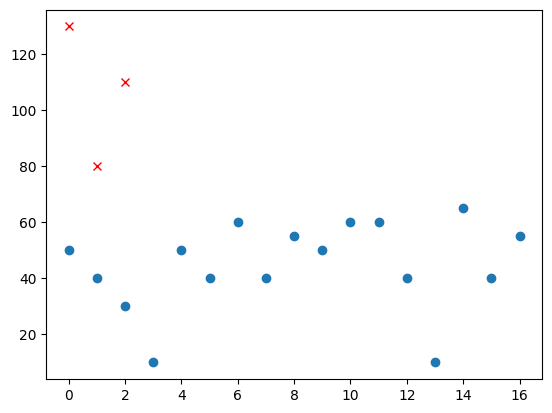

In [42]:
plt.plot(normal_pts, 'o')
plt.plot(anomalies, 'x', color='red')